In [68]:
from __future__ import print_function
import pandas as pd
import math
import numpy as np
import matplotlib
import pylab
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython.display import display
from IPython.display import HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [69]:
# Try simple widget functionality
def f(minimum):
    return minimum

def g(maximum): 
    return maximum

# Build a simple function to print out type and size of new elements
def whatis(thing, name="this"):
    print(name + " is a " + str(type(thing)) + " with a shape: " + str(thing.shape))
 

# Fermentation Tank Fill Levels:  Feb 1 - March 15th

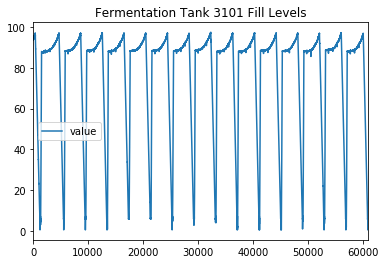

In [98]:
# Ingest the CSV file for fermentation fill and check array size
ferm_fill = pd.read_csv('./WPE.CAPHIST.LI_3101-PV.csv')
ferm_fill.plot(title='Fermentation Tank 3101 Fill Levels');

# Fourier Transform Analysis of Tank Fill Levels

In [99]:
# Convert the string data to datetime to separate Feb and March
ferm_fill['event_time'] = pd.to_datetime(ferm_fill['event_time'], errors='coerce')
# Split the fill levels into two data frames for comparison of Feb & March
ferm_fill_feb = ferm_fill.loc[ferm_fill["event_time"].dt.month==2]
# ferm_fill_feb = ferm_fill["event_time"].date.astype(0)
ferm_fill_mar = ferm_fill.loc[ferm_fill["event_time"].dt.month==3]

# FFT on the full date range and also for Feb and Mar separately
yf = fft(ferm_fill['value'])
yf_feb = fft(ferm_fill_feb['value'])
yf_mar = fft(ferm_fill_mar['value'])

## Move the sliders to select low and high pass filter

In [94]:
xf = ferm_fill.index
xf_feb = ferm_fill_feb.index
xf_mar = ferm_fill_mar.index
range = xf.shape[0]


N = 60963
# plt.plot(xf[0:300], np.abs(yf[0:300]))


def f2(LowPass, HighPass): 
    # display(a + b)
    # fig, axes = plt.subplots(nrows=2, ncols=2)
    # plt.plot(xf[a:b], np.abs(yf[a:b]), ax=axes[0,0])
    # plt.plot(xf_feb[a:b], np.abs(yf_feb[a:b]), ax=axes[0,1])
    # plt.plot(xf_mar[a:b], np.abs(yf_feb[a:b]), ax=axes[1,0])
    plt.plot(xf[LowPass:HighPass], np.abs(yf[LowPass:HighPass]))
    plt.title('FFT of Ferm Tank')
    return(LowPass + HighPass)

# interact(f, minimum=widgets.IntSlider(min=0,max=70000,step=100,value=55000));
# the value for the full tuple is not int eh documentation, it is: (initial value, min, max, step)
# example: interact(f, minimum=widgets.IntSlider(4, 3, 8, 1));
w = interactive(f2, LowPass=(0, range, 20), HighPass=(0, range, 20))
display(w)

interactive(children=(IntSlider(value=30480, description='LowPass', max=60963, step=20), IntSlider(value=30480…

# Comparison of Feb vs. March FFT of Tank Fill Levels

In [97]:
def rel_pos(min, max, df_full, df2, df3): 
    min_pos = min/df_full.shape[0]
    max_pos = max/df_full.shape[0]
    # retuns in fthe form of (df2_low, df2_high, df3_low, df3_high)
    ranges = (math.floor(min_pos * df2.shape[0]), math.floor(max_pos * df2.shape[0]), math.floor(min_pos * df3.shape[0]), math.floor(max_pos * df3.shape[0]))
    return ranges

# Call to get the monthly ranges
rng = rel_pos(18300, 35000, xf, xf_feb, xf_mar)


def f3(LowPass, HighPass): 
    # Full Timeline
    fig = plt.figure()
    ax = fig.add_subplot(221)
    plt.plot(xf[LowPass:HighPass], yf[LowPass:HighPass])
    plt.title('FFT of Full Date Range')
    
    rng = rel_pos(LowPass, HighPass, xf, xf_feb, xf_mar)

    # Feb
    ax = fig.add_subplot(222)
    plt.plot(xf_feb[rng[0]:rng[1]],yf_feb[rng[0]:rng[1]])
    plt.title('FFT of February')

    # March
    ax = fig.add_subplot(223)
    plt.plot(xf_mar[rng[2]:rng[3]],yf_mar[rng[2]:rng[3]])
    plt.title('FFT of March')

    plt.tight_layout()
    plt.show()
    
q = interactive(f3, LowPass=(0, range, 20), HighPass=(0, range, 20))
display(q)

interactive(children=(IntSlider(value=30480, description='LowPass', max=60963, step=20), IntSlider(value=30480…